In [1]:
from functions import *

/glade/u/apps/opt/conda/envs/npl-2024b/lib/python3.11/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'psl' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


In [2]:
snowdp = xr.open_dataset(lnd_dir_100 + 'b.e21.B1850CLM50SP.f09_g17.21ka.01.clm2.h0.SNOWDP.040101-050012.nc')["SNOWDP"]
qice_melt = xr.open_dataset(lnd_dir_100 + 'b.e21.B1850CLM50SP.f09_g17.21ka.01.clm2.h0.QICE_MELT.040101-050012.nc')["QICE_MELT"]
snow = xr.open_dataset(lnd_dir_100 + 'b.e21.B1850CLM50SP.f09_g17.21ka.01.clm2.h0.SNOW.040101-050012.nc')["SNOW"]
qice = xr.open_dataset(lnd_dir_100 + 'b.e21.B1850CLM50SP.f09_g17.21ka.01.clm2.h0.QICE.040101-050012.nc')["QICE"]
qs = xr.open_dataset(lnd_dir_100 + 'b.e21.B1850CLM50SP.f09_g17.21ka.01.clm2.h0.QSNWCPICE.040101-050012.nc')["QSNWCPICE"]

In [3]:
snowdp

<xarray.DataArray 'SNOWDP' (time: 1200, lat: 192, lon: 288)> Size: 265MB
[66355200 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 1kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 768B -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * time     (time) object 10kB 0401-02-01 00:00:00 ... 0501-01-01 00:00:00
Attributes:
    long_name:     gridcell mean snow height
    units:         m
    cell_methods:  time: mean

In [4]:
snowdp_all = xr.open_dataset(lnd_dir_100 + 'b.e21.B1850CLM50SP.f09_g17.21ka.01.clm2.h0.SNOWDP.040101-050012.nc')

In [5]:
area = snowdp_all["area"]

slicing data


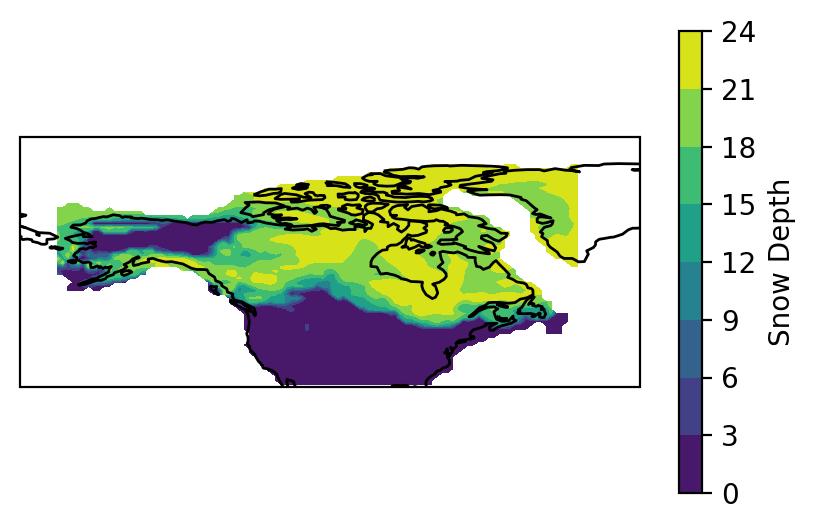

In [6]:
laurentide = preprocess_laurentide_no_des(snowdp)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(5, 3), dpi=200)
contour_plot = ax.contourf(laurentide.lon, laurentide.lat, laurentide[0])
ax.coastlines()
ax.set_extent([181, 330, 30, 90], crs=ccrs.PlateCarree())

cbar = plt.colorbar(contour_plot, ax=ax)
coords = snowdp.assign_coords(lon=(snowdp.lon - 180))


cbar.set_label('Snow Depth')
plt.show()

In [7]:
l = preprocess_laurentide_no_des(snowdp)
laurentide = l.sel(
        lat=slice(30, 90), lon=slice(0, 130))
laurentide

slicing data


<xarray.DataArray 'SNOWDP' (time: 1200, lat: 64, lon: 0)> Size: 0B
[0 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0B 
  * lat      (lat) float32 256B 30.63 31.57 32.51 33.46 ... 88.12 89.06 90.0
  * time     (time) object 10kB 0401-02-01 00:00:00 ... 0501-01-01 00:00:00
Attributes:
    long_name:     gridcell mean snow height
    units:         m
    cell_methods:  time: mean

In [8]:
l

<xarray.DataArray 'SNOWDP' (time: 1200, lat: 64, lon: 101)> Size: 31MB
[7756800 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 404B 190.0 191.2 192.5 193.8 ... 312.5 313.8 315.0
  * lat      (lat) float32 256B 30.63 31.57 32.51 33.46 ... 88.12 89.06 90.0
  * time     (time) object 10kB 0401-02-01 00:00:00 ... 0501-01-01 00:00:00
Attributes:
    long_name:     gridcell mean snow height
    units:         m
    cell_methods:  time: mean

In [9]:
np.max(snowdp)

<xarray.DataArray 'SNOWDP' ()> Size: 8B
array(38.84757996)

Latitude: 58.9005241394043, Longitude: 216.25


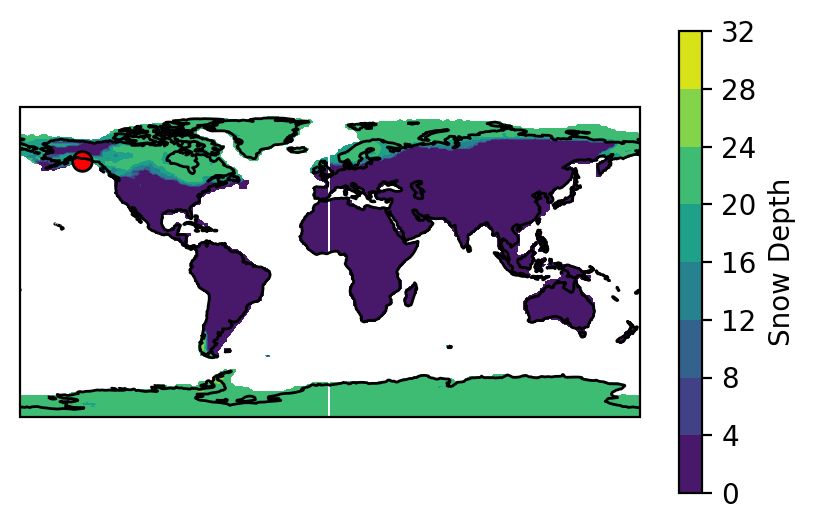

In [10]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(5, 3), dpi=200)
ax.coastlines()
contour_plot = ax.contourf(snowdp.lon, snowdp.lat, snowdp[0])

locations = snowdp.where(snowdp == np.max(snowdp), drop=True)
for lat, lon in zip(locations.lat.values, locations.lon.values):
    ax.scatter(lon, lat, color='red', s=50, edgecolor='black', transform=ccrs.PlateCarree())
    print(f"Latitude: {lat}, Longitude: {lon}")

# Add colorbar
cbar = plt.colorbar(contour_plot, ax=ax)
cbar.set_label('Snow Depth')

plt.show()

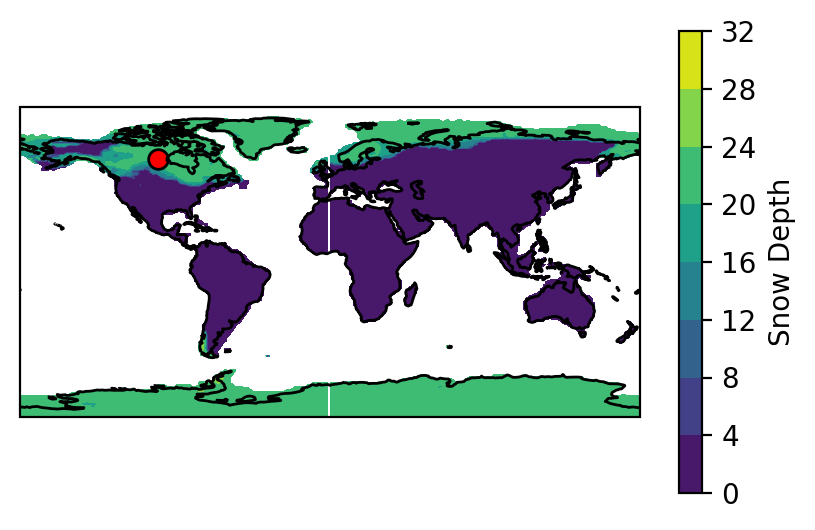

In [11]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(5, 3), dpi=200)
ax.coastlines()
contour_plot = ax.contourf(snowdp.lon, snowdp.lat, snowdp[0])
ax.scatter(260, 60, color='red', s=50, edgecolor='black', transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour_plot, ax=ax)
cbar.set_label('Snow Depth')

plt.show()

Find a cell in the middle of the ice sheet

In [12]:
value_at_location = snowdp.sel(lat=60, lon=260, method='nearest').values
print(f"Snow Depth at Latitude 60, Longitude 250: {value_at_location}")

Snow Depth at Latitude 60, Longitude 250: [20.661293 20.658176 20.654509 ... 20.682293 20.679178 20.675098]


Confirm there is no melting

In [13]:
value_at_location = qice_melt.sel(lat=60, lon=260, method='nearest').values
print(f"Confirming Snow Melt at Latitude 60, Longitude 250: {value_at_location}")

Confirming Snow Melt at Latitude 60, Longitude 250: [0. 0. 0. ... 0. 0. 0.]


Now the amount of Snow Accumultation = SMB so should = QICE

In [14]:
value_at_location = snow.sel(lat=60, lon=260, method='nearest').values
print(f"Amount Snow at Latitude 60, Longitude 250: {value_at_location}")

Amount Snow at Latitude 60, Longitude 250: [7.4780570e-07 4.3960546e-07 2.2440823e-07 ... 1.3480768e-06 1.4962753e-06
 4.4271869e-07]


In [15]:
value_at_location = qice.sel(lat=60, lon=260, method='nearest').values
print(f"Amount Qice at Latitude 60, Longitude 250: {value_at_location}")

Amount Qice at Latitude 60, Longitude 250: [1.0737305e-06 7.1602699e-07 3.7468027e-07 ... 1.7327527e-06 1.8558694e-06
 7.2960819e-07]


This is not the case....

In [16]:
value_at_location = qs.sel(lat=60, lon=260, method='nearest').values
print(f"Amount QS at Latitude 60, Longitude 250: {value_at_location}")

Amount QS at Latitude 60, Longitude 250: [1.0737305e-06 7.1602699e-07 3.7468027e-07 ... 1.7327527e-06 1.8558694e-06
 7.2960819e-07]


In [17]:
depth_over_area = snowdp/area

In [21]:
pct_ice = xr.open_dataset(ice_dir + 'surfdata_fv09_hist_16pfts_nourb_CMIP6_21ka.c200624.nc')["PCT_GLACIER"]
ice_mask = np.tile(xr.where(pct_ice == 100, 1, np.nan), (snowdp.shape[0], 1, 1))

In [22]:
snowdp = snowdp * ice_mask
snow = snow * ice_mask
qice = qice * ice_mask
qs = qs * ice_mask


slicing data
slicing data
slicing data
slicing data


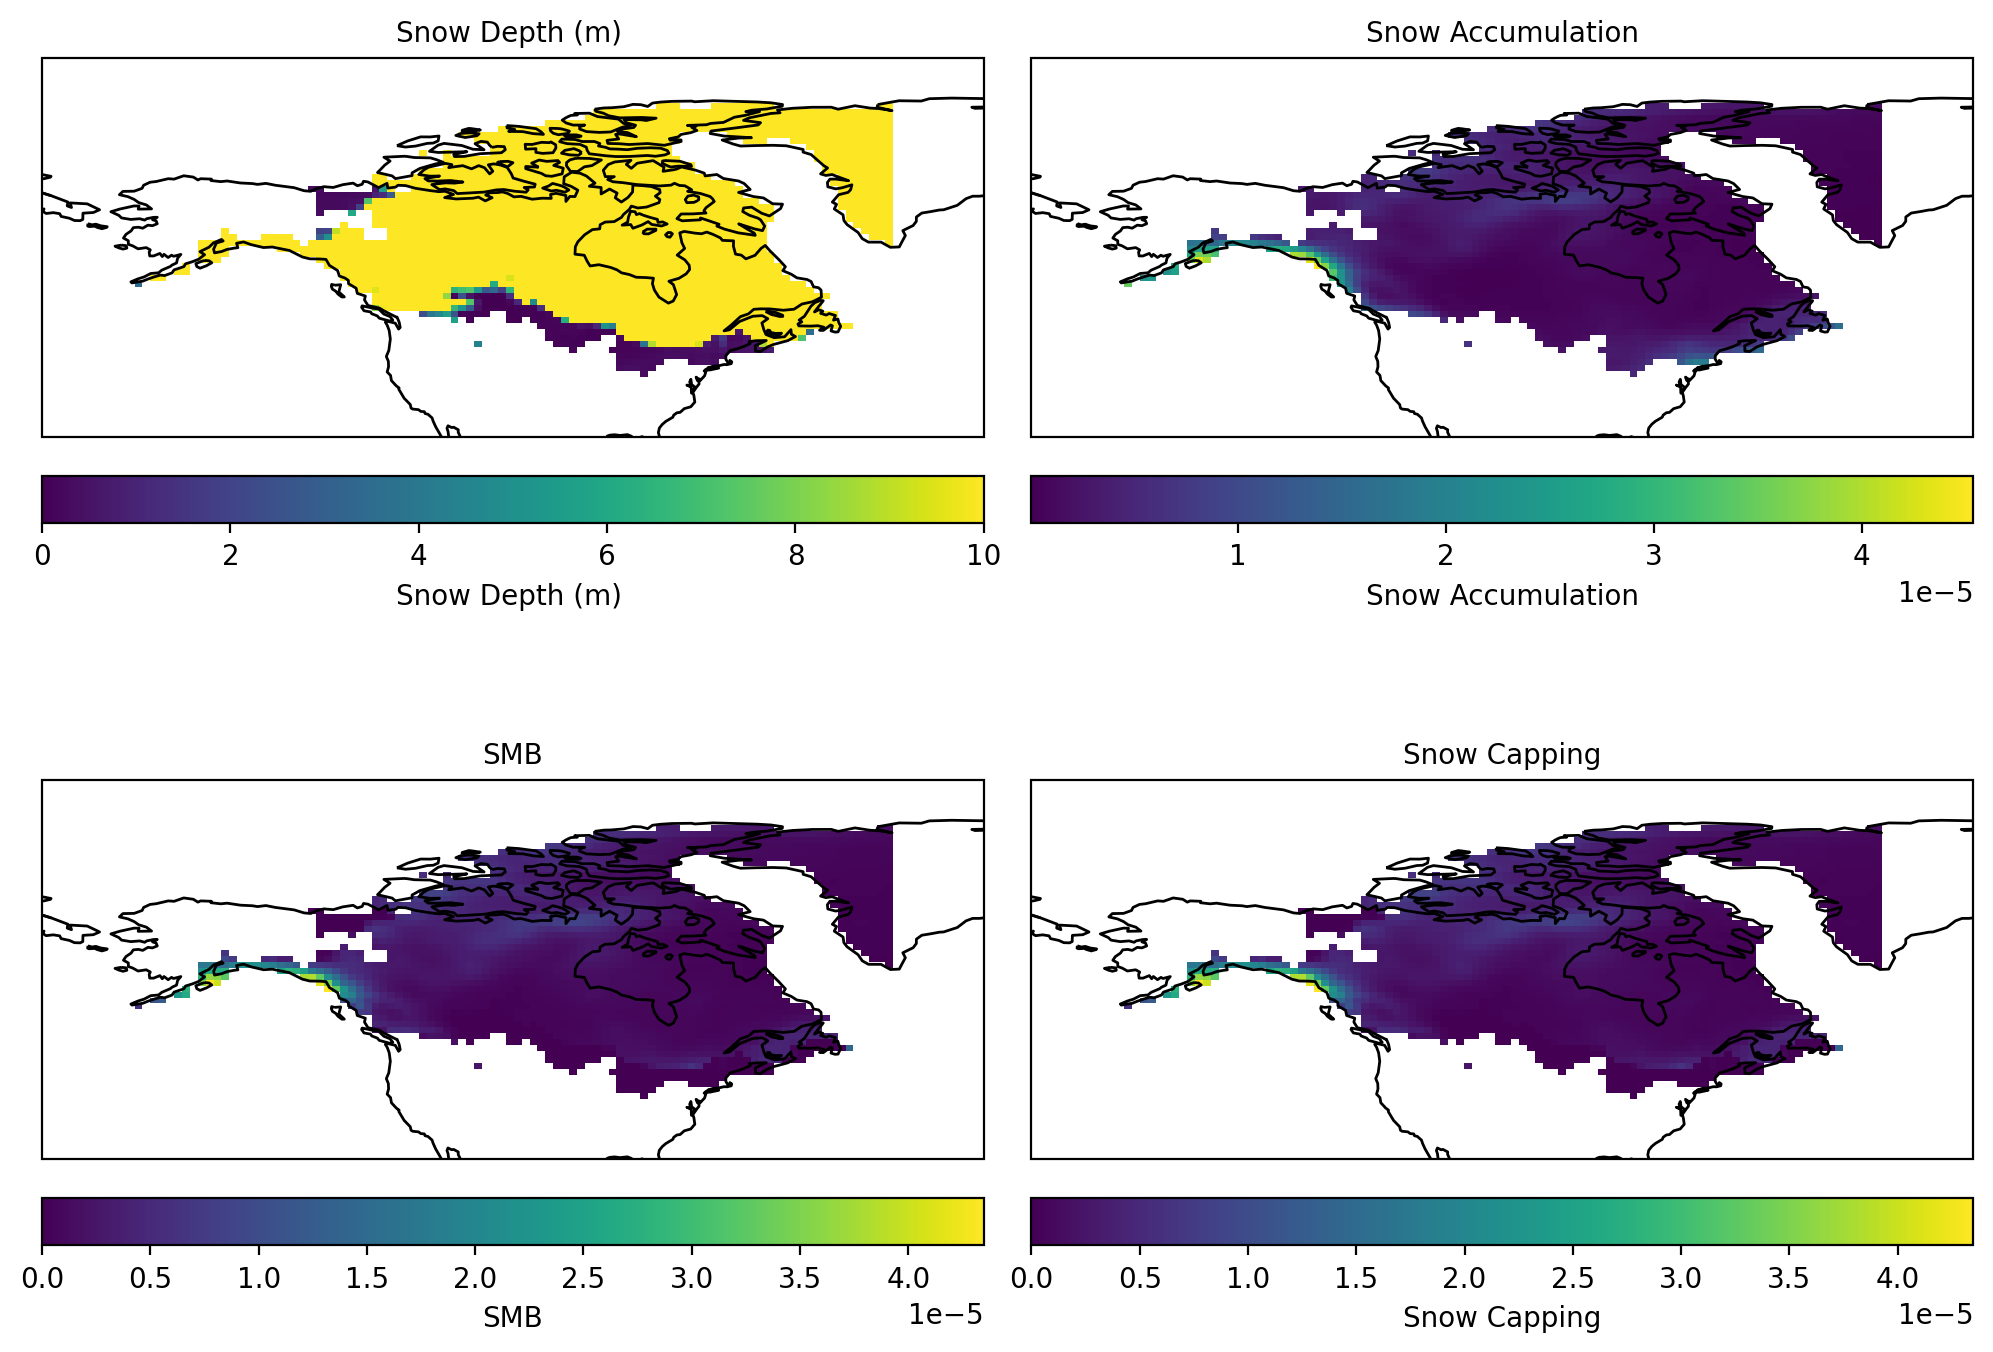

In [23]:
# Variables to plot and their corresponding labels
variables = {
    "snowdp": "Snow Depth (m) ",
    "snow": "Snow Accumulation",
    "qice": "SMB",
    "qs": "Snow Capping"
}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8), dpi=200)

# Loop through variables and their corresponding subplot axes
for ax, (var_name, label) in zip(axes.flat, variables.items()):
    data = eval(var_name)  # Use variable name as string to fetch the corresponding data
    data_processed = preprocess_laurentide_no_des(data)
    
    if var_name == "snowdp":
    # Plot the data using pcolormesh
        mesh = ax.pcolormesh(
            data_processed.lon, 
            data_processed.lat, 
            data_processed[0], 
            transform=ccrs.PlateCarree(), 
            shading='auto',
            vmin = 0,
            vmax = 10
        )
    else:
          mesh = ax.pcolormesh(
            data_processed.lon, 
            data_processed.lat, 
            data_processed[0], 
            transform=ccrs.PlateCarree(), 
            shading='auto'
        )
    ax.coastlines()
    ax.set_extent([181, 330, 30, 90], crs=ccrs.PlateCarree())
    
    # Add colorbar


    cbar = plt.colorbar(mesh, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label(label)
    
    # Add title for each subplot
    ax.set_title(label, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


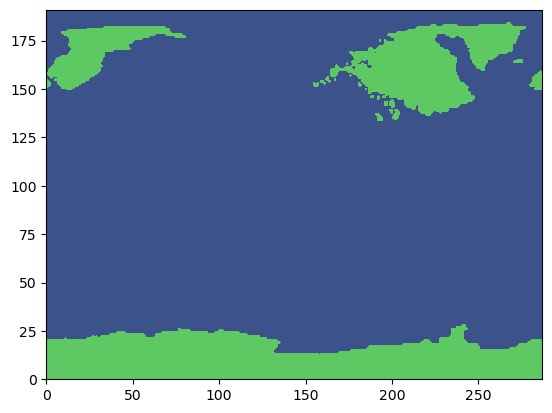

In [43]:
plt.contourf(qice[0]==qs[0])